In [1]:
import numpy as np

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

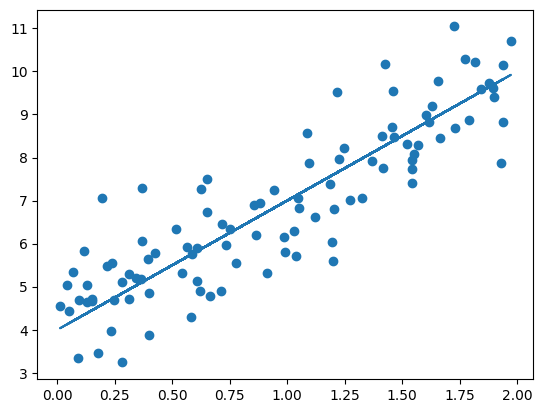

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.plot(X, 4 + 3 * X)
plt.show()

In [4]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.21509616],
       [2.77011339]])

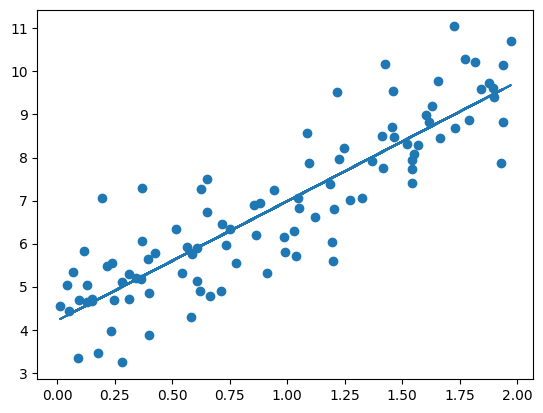

In [5]:
plt.scatter(X, y)
plt.plot(X, theta_best[0] + theta_best[1] * X)
plt.show()

In [6]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

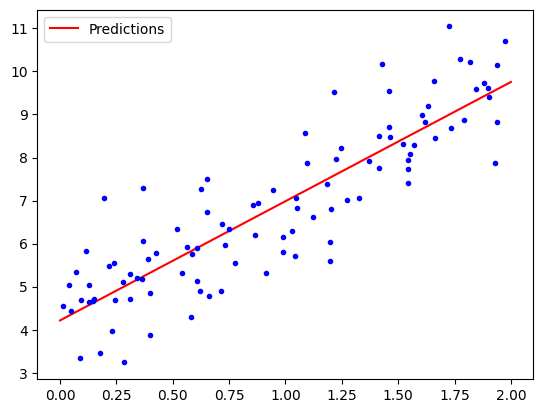

In [9]:
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, 'b.')
plt.legend()
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [11]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [12]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [13]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

In [14]:
eta = 0.1
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

theta

array([[4.21509616],
       [2.77011339]])

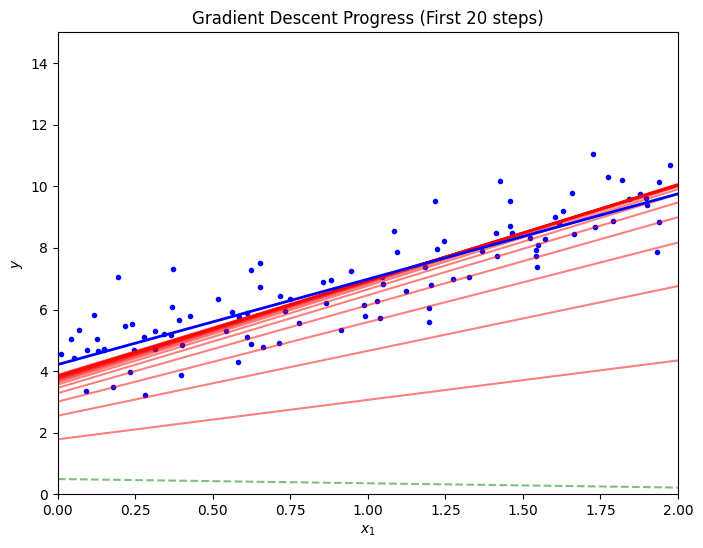

In [22]:
# 1. 先画出原始数据散点图
plt.figure(figsize=(8, 6))
plt.plot(X, y, 'b.')    # b 决定了颜色是蓝色，. 决定了画的是散点图

# 2. 准备预测用的 X 坐标
# 我们取 0 和 2 两个点，连接成线即可
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]     # c_ 是 column concatenation 的缩写

# 3. 梯度下降并绘图
eta = 0.1
n_epochs = 1000
np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(1000):
    if epoch < 20:
        y_predict = X_new_b @ theta
        style = 'r-' if epoch > 0 else 'g--'     # r 表示红色, - 表示实线, g 表示绿色, -- 表示虚线
        plt.plot(X_new, y_predict, style, alpha=0.5)

    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

# 4. 最后画出收敛后的最终直线
y_predict = X_new_b @ theta
plt.plot(X_new, y_predict, 'b-', linewidth=2, label='Final Model')

plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.axis([0, 2, 0, 15])
plt.title('Gradient Descent Progress (First 20 steps)')
plt.show()